In [37]:

# Import package
# Used to load the Boston housing price data set
from sklearn.datasets import load_boston
# pandas toolkit If you are unfamiliar with pandas, you can refer to the official 10-minute tutorial: https://pandas.pydata.org/pandas-docs/stable/10min.html
import pandas as pd
import numpy as np
# seaborn for drawing
import seaborn as sns
import matplotlib.pyplot as plt
# Show drawing
%matplotlib inline


data = load_boston() # load datase

data.keys() # Fields inside data

df = pd.DataFrame(data['data'])

# Looking at the first 5 rows of the dataframe, we can see that the column names are numbers
df.head(5)

data['feature_names'] # Feature name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# The Table params and chinese info

```
params	chinese info
CRIM	住房所在城镇的人均犯罪率
ZN	住房用地超过 25000 平方尺的比例
INDUS	住房所在城镇非零售商用土地的比例
CHAS	有关查理斯河的虚拟变量（如果住房位于河边则为1,否则为0 ）
NOX	一氧化氮浓度
RM	每处住房的平均房间数
AGE	建于 1940 年之前的业主自住房比例
DIS	住房距离波士顿五大中心区域的加权距离
RAD	离住房最近的公路入口编号
TAX 每 10000 美元的全额财产税金额
PTRATIO	
住房所在城镇的师生比例
B	1000(Bk-0.63)^2,其中 Bk 指代城镇中黑人的比例
LSTAT	弱势群体人口所占比例
MEDV	业主自住房的中位数房价（以千美元计）
```

In [9]:
# Replace numeric column names with feature names
df.columns = data['feature_names']
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# The target is the house price, which is also our target value. We assign the target value to the dataframe
df['price'] = data['target']
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


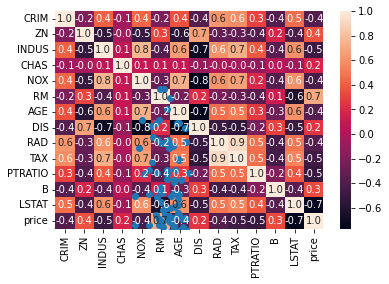

In [18]:
# View the correlation coefficient between the feature and price, positive correlation and negative correlation
sns.heatmap(df.corr(), annot=True, fmt='.1f')

plt.scatter(df['RM'], df['price'])


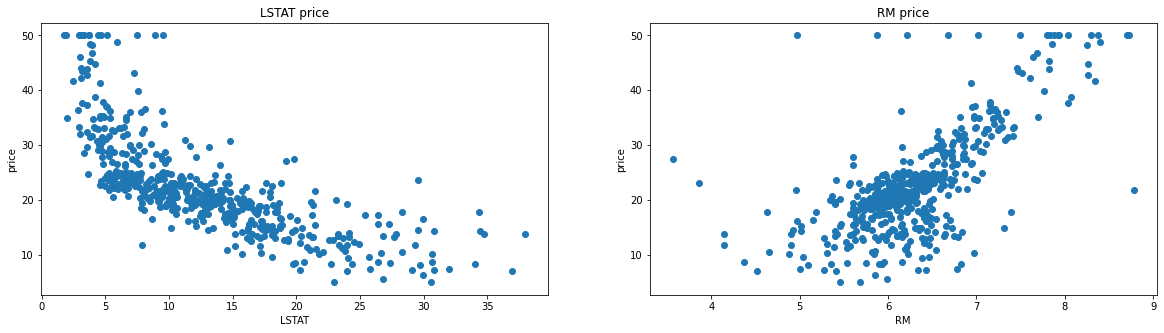

In [19]:
plt.figure(figsize=(20, 5))

# View the data distribution display of some features and price
features = ['LSTAT', 'RM']
target = df['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title('{} price'.format(col))
    plt.xlabel(col)
    plt.ylabel('price')

In [26]:
# Simple example: univariate forecast price
x = df['RM']
y = df['price']

history_notes = {_x: _y for _x, _y in zip(x,y)}

history_notes[6.575]

24.0

In [27]:
# Find the top three prices that are closest to RM:6.57,
similary_ys = [y for _, y in sorted(history_notes.items(), key=lambda x_y: (x_y[0] - 6.57) ** 2)[:3]]
similary_ys

[23.8, 24.0, 24.8]

In [69]:
# Calculate the average of three
np.mean(similary_ys)

24.2

## Use historical data to predict data that has never been seen before, the most direct method
### K-Neighbor-Nearst

In [70]:
def knn(query_x, history, top_n = 3):
    sorted_notes = sorted(history.items(), key = lambda x_y: (x_y[0] - query_x)**2) 
    similar_notes = sorted_notes[:top_n]
    similar_ys = [y for _, y in similar_notes]

    return np.mean(similar_ys)

knn(5.4, history_notes)

15.700000000000001

### In order to obtain results faster, we hope to obtain predictive power by fitting a function
$$ f(rm) = k * rm + b $$ 

## Random Approach
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} (\hat{y_i} - y_i) ^ 2 $$
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

In [71]:
def loss(y_hat, y):
    return np.mean((y_hat - y)**2)

import random

min_loss = float('inf')

best_k, best_b = None, None


for step in range(1000):
    min_v, max_v = -100, 100
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [k * rm_i + b for rm_i in x]
    current_loss = loss(y_hats, y)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print(f'{step}, we have func f(rm) = {k} * rm + {b},  lss is :{current_loss}')

0, we have func f(rm) = 6 * rm + 26,  lss is :1743.7224223162057
36, we have func f(rm) = 8 * rm + -44,  lss is :308.4477988300396
115, we have func f(rm) = 18 * rm + -100,  lss is :171.14501665612647
274, we have func f(rm) = 10 * rm + -43,  lss is :51.214847233201574


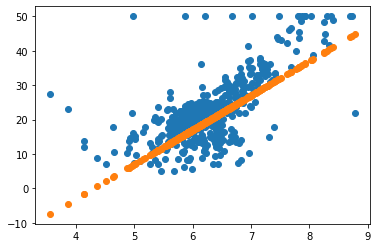

In [72]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## Monte Carlo simulation(蒙特卡洛模拟)
## Supervisor

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

$$ \frac{\partial{loss(k, b)}}{\partial{k}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) * rm_i $$

$$ \frac{\partial{loss(k, b)}}{\partial{b}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i)$$

In [93]:
def partial_k(k, b, x, y):
    return 2  * np.mean((k*x+b-y) * x)

def partial_b(k, b, x, y):
    return 2 * np.mean(k*x+b-y)

k, b = random.random(), random.random()
min_loss = float('inf')

best_k, best_b = None, None
learning_rate = 1e-2

for step in range(2000):
    k, b = k + (-1 * partial_k(k, b, x, y) * learning_rate), b + (-1 * partial_b(k, b, x, y) * learning_rate)
    y_hats = k * x + b
    current_loss = loss(y_hats, y)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print(f'setp {step}, we have func f(rm) = {k} * rm + {b},  lss is :{current_loss}')


setp 0, we have func f(rm) = 2.961103695427287 * rm + 0.9031030862278024,  lss is :71.30295191846919
setp 1, we have func f(rm) = 3.4012398046581263 * rm + 0.9635080688095248,  lss is :59.6506405563312
setp 2, we have func f(rm) = 3.481768534481132 * rm + 0.9673830611958656,  lss is :59.26391442491127
setp 3, we have func f(rm) = 3.497404415767652 * rm + 0.9610586812421712,  lss is :59.24404024709036
setp 4, we have func f(rm) = 3.5013298587257813 * rm + 0.9528954729433544,  lss is :59.236115605173985
setp 5, we have func f(rm) = 3.5031418410226927 * rm + 0.944402129334509,  lss is :59.228583583267834
setp 6, we have func f(rm) = 3.504572175540989 * rm + 0.9358508996727916,  lss is :59.2210678444518
setp 7, we have func f(rm) = 3.505933374872268 * rm + 0.9272909120143266,  lss is :59.213556132144184
setp 8, we have func f(rm) = 3.5072818332213767 * rm + 0.9187310313065229,  lss is :59.20604804554477
setp 9, we have func f(rm) = 3.5086277272108335 * rm + 0.9101728568586609,  lss is :59.

In [74]:
best_k, best_b

(5.6031368068875596, -12.413245863176542)

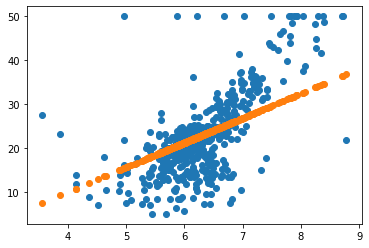

In [75]:

plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## Supervised Learning
### We turn the forecast of housing prices into a more responsible and sophisticated model. What should we do?

$$ f(x) = k * x + b $$

$$ f(x) = k2 * \sigma(k_1 * x + b_1) + b2 $$

$$ \sigma(x) = \frac{1}{1 + e^(-x)} $$ 

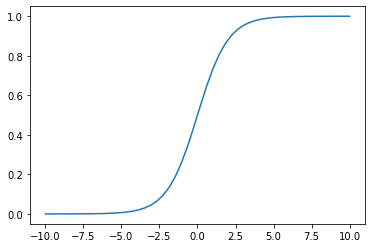

In [76]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

sub_x = np.linspace(-10, 10)
plt.plot(sub_x, sigmoid(sub_x))

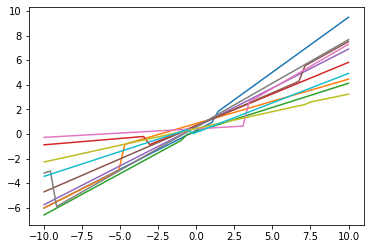

In [77]:
def random_linear(x):
    k, b = random.random(), random.random()
    return k * x + b

def complex_function(x):
    return (random_linear(x))

for _ in range(10):
    index = random.randrange(0, len(sub_x))
    sub_x_1, sub_x_2 = sub_x[:index], sub_x[index:]
    new_y = np.concatenate((complex_function(sub_x_1), complex_function(sub_x_2)))
    plt.plot(sub_x, new_y)



## We can implement more complex functions through simple, basic modules and repeated superposition

## For more and more complex functions? How does the computer seek guidance?

## 1. What is machine learning?
## 2. The shortcomings of this method of KNN, what is the background of the proposed linear fitting
## 3. How to get faster function weight update through supervision method
## 4. The combination of nonlinear and linear functions can fit very complex functions
## 5. Deep learning we can fit more complex functions through basic function modules

## Assigment:

$$ L2-Loss(y, \hat{y}) = \frac{1}{n}\sum{(\hat{y} - y)}^2 $$
$$ L1-Loss(y, \hat{y}) = \frac{1}{n}\sum{|(\hat{y} - y)|} $$


## L2-Loss becomes L1Loss and achieves gradient descent

### Realize L1Loss gradient descent from 0

In [97]:
# 1. import package
import numpy as np
import pandas as pd

In [98]:
# 2. load data
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [99]:
data_train = data.data
data_traget = data.target


In [81]:
df = pd.DataFrame(data_train, columns = data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [100]:
df.describe() # Data description, you can view the statistics of each variable

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 3. Data preprocessing

Normalization or standardization can prevent a certain dimension or a few dimensions from affecting the data too much when there are very many dimensions, and secondly, the program can run faster. There are many methods, such as standardization, min-max, z-score, p-norm, etc. How to use it depends on the characteristics of the data set.

[Further reading-数据标准化的迷思之深度学习领域](https://zhuanlan.zhihu.com/p/81560511)

In [102]:
from sklearn.preprocessing import StandardScaler
# z = (x-u) / s u is the mean, s is the standard deviation
ss = StandardScaler() 
data_train = ss.fit_transform(data_train)
# For linear models, normalization or standardization is generally required, otherwise gradient explosion will occur, and tree models are generally not required
data_train = pd.DataFrame(data_train, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
data_train.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-5.616939e-17,6.319056e-17,-3.145486e-15,-2.106352e-17,2.752300e-15,-1.150770e-14,-1.137430e-15,7.582867e-16,5.616939e-17,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [103]:
# y=Σwixi+
# Because the derivation of b is all 1, add a bias b to the data and set it to 1, as a feature of the data and update the gradient wi*b=wi
data_train['bias']  = 1
data_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,bias
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,1
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,1
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,1
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,1


Divide the data set, where 20% of the data is used as the test set X_test, y_test, and the other 80% are used as the training set X_train, y_train, where random_state is the random seed

In [85]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_train, data_traget, test_size = 0.2, random_state=42)


In [86]:
print('train_x.shape, train_y.shape', train_x.shape, train_y.shape)
print('test_x.shape, test_y.shape', test_x.shape, test_y.shape)

train_x.shape, train_y.shape (404, 14) (404,)
test_x.shape, test_y.shape (102, 14) (102,)


In [87]:
train_x = np.array(train_x)

### Model training and gradient update

In [105]:
def l1_cost(x, y, theta):
    """
    x: 特征
    y: 目标值
    thta: 模型参数
    """
    k = x.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost += 1/k * np.abs(y[i] -theta.dot(x[i, :]))
    return total_cost

def l2_cost(x, y, theta):
    k = x.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost += 1/k * (y[i] -theta.dot(x[i,:])) ** 2
    return total_cost

np.zeros(10).shape


(10,)

In [106]:
def step_l1_gradient(x, y, learning_rate, theta):
    """
    Function to calculate the gradient of the MAE loss function
    Return the gradient value 0 for the non-differentiable point at 0
    X:特征向量
    y：目标值
    learing_rate:学习率
    theta:参数
    """
    n = x.shape[0]
        # print(n)
    e = y - x @ theta
    gradients = - (x.T @ np.sign(e)) / n # sign is a sign function
    thata = theta - learning_rate * gradients
    return theta

def step_l2_gradient(x, y, learning_rate, theta):
    k = x.shape[0]
    n = x.shape[1]
    gradients = np.zeros(n)
    for i in range(k):
        for j in range(n):
            gradients[j] += (-2/k) * (y[i] - (theta.dot(x[i, :]))) * x[i, j]
    theta = theta - learning_rate * gradient
    return theta

# def step_gradient(X, y, learning_rate, theta):
#     """
#     X:特征向量
#     y：目标值
#     learing_rate:学习率
#     theta:参数
#     """
#     m_deriv = 0
#     N = len(X)
#     for i in range(N):
#         # 计算偏导
#         # -x(y - (mx + b)) / |mx + b|
#         m_deriv += - X[i] * (y[i] - (theta*X[i] + b)) / abs(y[i] - (theta*X[i] + b))
#     # We subtract because the derivatives point in direction of steepest ascent
#     theta -= (m_deriv / float(N)) * learning_rate
# #     theta = theta - learning_rate * gradients
#     return theta

def gradient_descent(train_x, train_y, learning_rate, iterations):
    k = train_x.shape[0]
    n = train_x.shape[1]
    theta = np.zeros(n) # Initialization parameters

    loss_values = []
    # print(theta.shape)

    for i in range(iterations):
        theta = step_l1_gradient(train_x, train_y, learning_rate, theta)
        loss = l1_cost(train_x, train_y, theta)
        loss_values.append(loss)
        print(i, 'cost:', loss)
    return theta, loss_values

In [107]:
#  Training parameters
learning_rate = 0.04 # Learning rate
iterations = 300 # Number of iterations
theta, loss_values = gradient_descent(train_x, train_y, learning_rate, iterations)

0 cost: 22.79653465346535
1 cost: 22.79653465346535
2 cost: 22.79653465346535
3 cost: 22.79653465346535
4 cost: 22.79653465346535
5 cost: 22.79653465346535
6 cost: 22.79653465346535
7 cost: 22.79653465346535
8 cost: 22.79653465346535
9 cost: 22.79653465346535
10 cost: 22.79653465346535
11 cost: 22.79653465346535
12 cost: 22.79653465346535
13 cost: 22.79653465346535
14 cost: 22.79653465346535
15 cost: 22.79653465346535
16 cost: 22.79653465346535
17 cost: 22.79653465346535
18 cost: 22.79653465346535
19 cost: 22.79653465346535
20 cost: 22.79653465346535
21 cost: 22.79653465346535
22 cost: 22.79653465346535
23 cost: 22.79653465346535
24 cost: 22.79653465346535
25 cost: 22.79653465346535
26 cost: 22.79653465346535
27 cost: 22.79653465346535
28 cost: 22.79653465346535
29 cost: 22.79653465346535
30 cost: 22.79653465346535
31 cost: 22.79653465346535
32 cost: 22.79653465346535
33 cost: 22.79653465346535
34 cost: 22.79653465346535
35 cost: 22.79653465346535
36 cost: 22.79653465346535
37 cost: 22